In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear

sns.set(style="white", context="talk")

# Intento hayar patrones o comportamientos en base a eventos

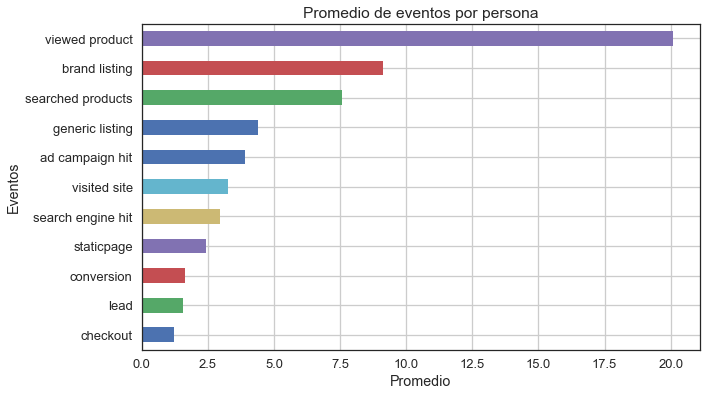

In [15]:
promedio_eventos_por_persona = data.groupby('person')['event'].value_counts().unstack('event').mean().sort_values()

graf = promedio_eventos_por_persona.plot(kind = 'barh', figsize = (10, 6))
graf.set_title('Promedio de eventos por persona')
graf.set_xlabel('Promedio')
graf.set_ylabel('Eventos')
graf.grid(True)


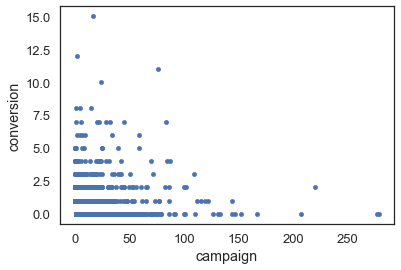

In [17]:
eventos = data[(data['event'] == 'conversion') | (data['event'] == 'ad campaign hit')]
eventos = eventos.groupby('person')['event'].value_counts().to_frame('cantidad')
eventos = eventos.unstack('event')
eventos = eventos.reset_index()
eventos.columns = ['person', 'campaign', 'conversion']
eventos.fillna(0, inplace=True)
eventos.plot.scatter(x = 'campaign', y = 'conversion')